In [1]:
import os
import cv2
import numpy as np 
import matplotlib.pyplot as plt

data_dir = '/kaggle/input/image-grid'
data_file = os.listdir(data_dir)
data_file.sort()
data_file

['fig3.jpg', 'fig4.jpg', 'girl_face_1.jpg', 'winter_2.jpg']

### Loading all original images

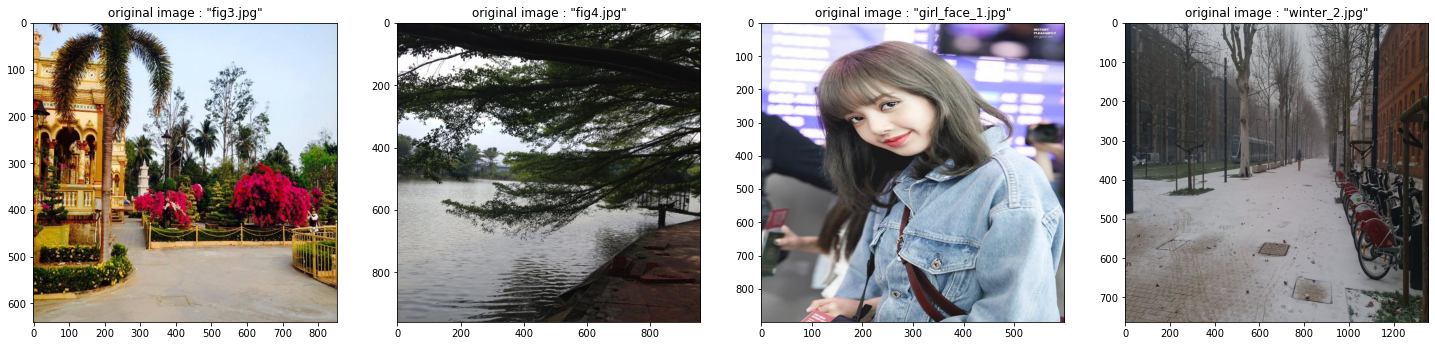

In [2]:
n = len(data_file)
fig, ax = plt.subplots(1, 4, figsize=(25, 5.5))
for k in range(n):
    img = cv2.imread(os.path.join(data_dir, data_file[k]))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    ax[k].imshow(img, aspect="auto")
    ax[k].set_title('original image : "%s"'%(data_file[k]))
plt.show()

### Define a function

In [3]:
def spliting_image_to_grid(img_id, nr, nc, new_shape = (256, 256)):
    """
    Input:  img_id (str): image_id from the dataset of image file
            nr, nc (int): number of rows, columns of grid
            new_shape (tuple of int) : a shape of each image in grid
    return: list of images size with a desired shapes
    """
    ## read the image
    img = cv2.imread(os.path.join(data_dir, f'{img_id}'))
    ## convert color to display in matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    ## return height and witdh of the image
    h, w = img.shape[: 2]
    ## calculate the original_size of height, with in each tiles of images
    hs, ws = int(h / nr), int(w / nc)
    img_ls = []
    
    for i in range(nr):
        for j in range(nc):
            image_dt = img[ int(i*hs) : int((i+1)*hs), int(j*ws) : int((j+1)*ws), :]
            ## resize the image to the desired shape
            image_dt = cv2.resize(image_dt, new_shape, interpolation = cv2.INTER_AREA)
            img_ls.append(image_dt)
                
    return img_ls

nrows = 3; ncols = 4
X = spliting_image_to_grid(data_file[0], nrows, ncols)
type(X), np.array(X).shape

(list, (12, 256, 256, 3))

This meant for `nrows = 3` and `ncols = 4`, the `function` returns a `list` of `256 x 256 (default)` sub_images from w.r.t the grid `nrows x ncols`.

Noting that, in many cases; we want to **store** the data of `3D_array` of the `image_in_grid` from a `very_large_image` to simplify the computation in `training` and `evaluation`. So this function only return a list of images, not showing!! 

To showing the result of this function, we will define another type of this, named `display_image_in_grid()`

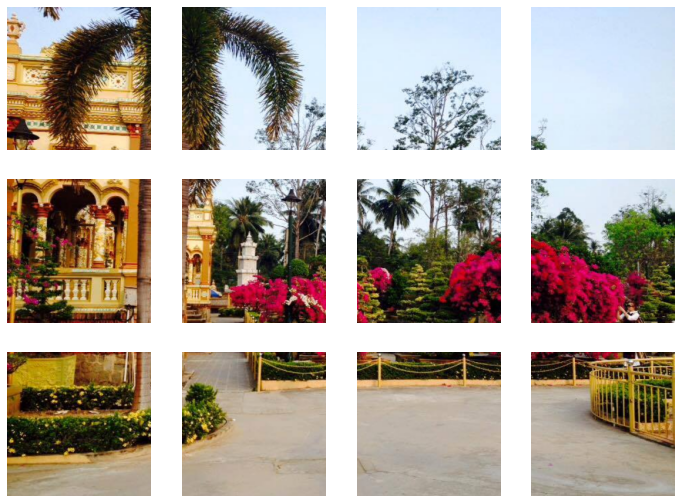

In [4]:
def display_image_in_grid(img_id, nr, nc, new_shape = (256, 256), fs = (30, 30)):
    """
    Input:  img_id (str): image_id from the dataset of image file
            nr, nc (int): number of rows, columns of grid
            new_shape (tuple of int) : a shape of each image in grid
            fs (tupple of numbers): figsize of plot
    return: display a grid of images size with a desired shapes
    """
    X = spliting_image_to_grid(img_id, nr, nc, new_shape)
    plt.figure(figsize = fs)
    for k in range(nr*nc):
        plt.subplot(nr, nc, k+1)
        plt.imshow(X[k])
        plt.axis('off')
        
display_image_in_grid(data_file[0], nrows, ncols, fs = (12, 9))

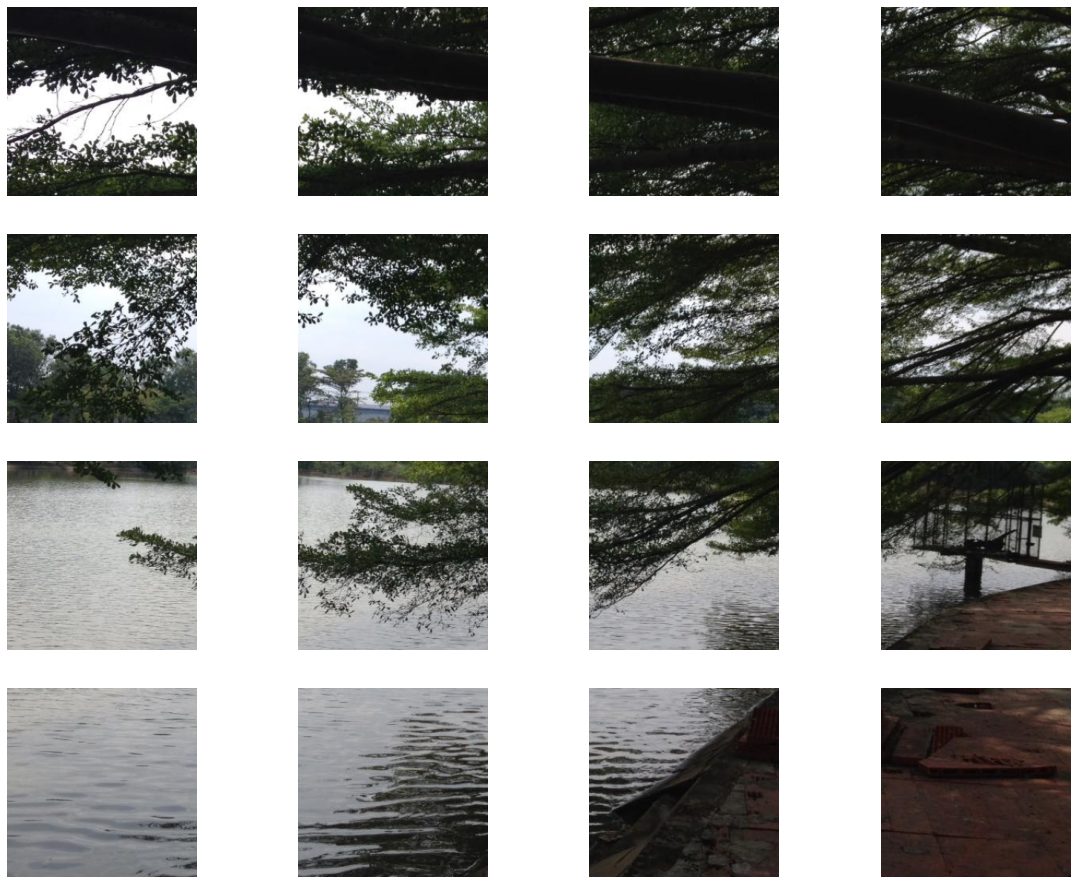

In [5]:
display_image_in_grid(data_file[1], 4, 4, fs = (20, 16))

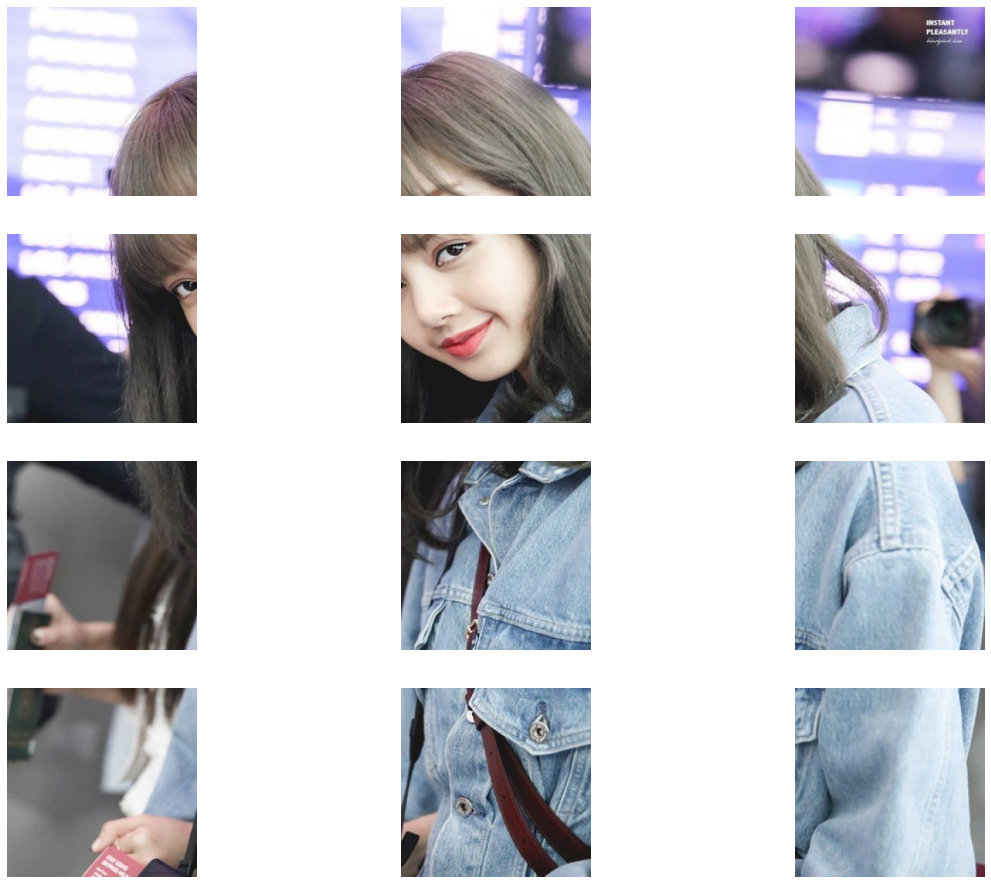

In [6]:
display_image_in_grid(data_file[2], 4, 3, fs = (20, 16))

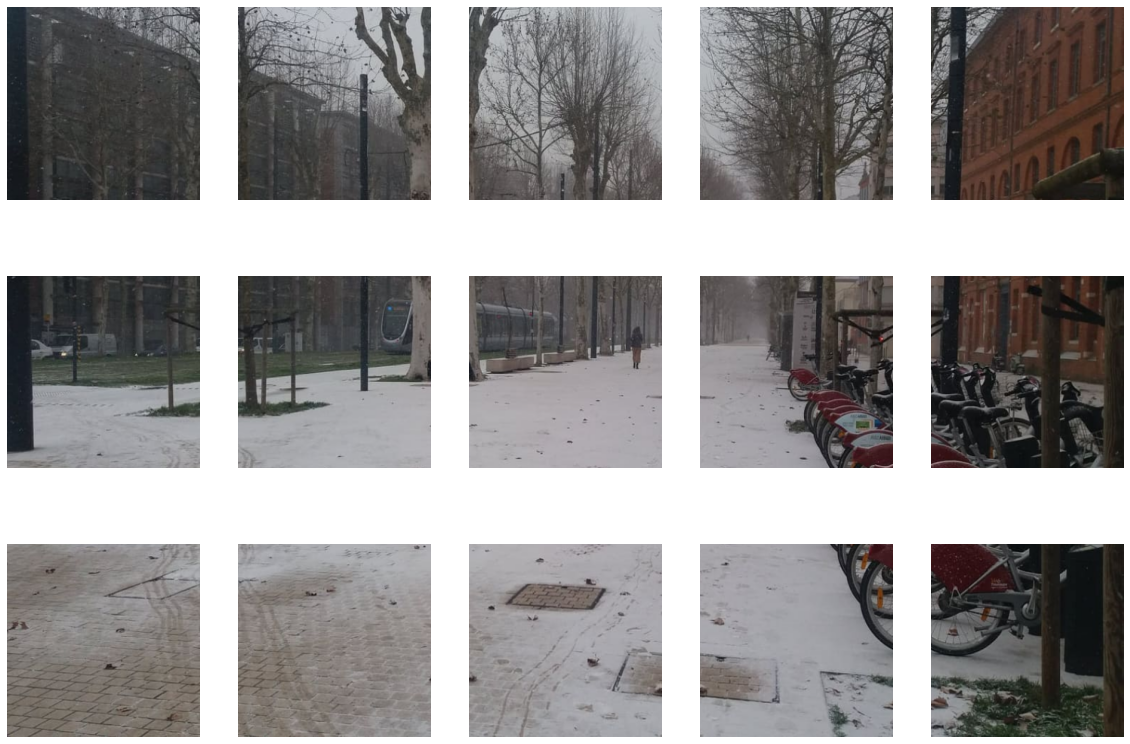

In [7]:
display_image_in_grid(data_file[3], 3, 5, fs = (20, 14))